In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

dr = pd.read_csv('../data/titanic/train.csv')

dr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [7]:
dr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


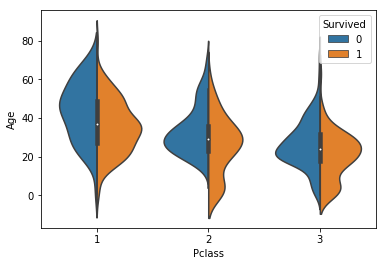

In [35]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=dr, split=True)

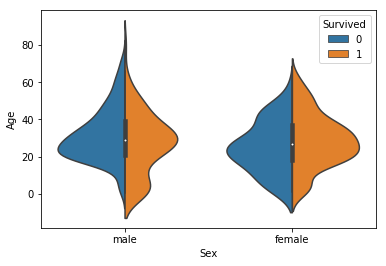

In [42]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=dr, split=True)

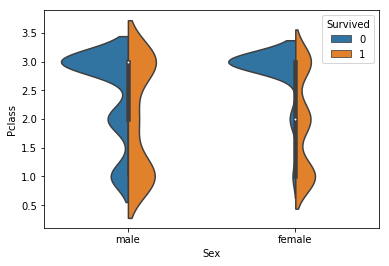

In [51]:
sns.violinplot(x="Sex", y="Pclass", hue="Survived", data=dr, split=True)

In [52]:
print "Shape", dr.shape

print "Expand Pclass to one-hot"
dr = pd.concat([dr, pd.get_dummies(dr["Pclass"], prefix="Class")], axis=1)

print "Shape", dr.shape
dr.head()

Shape (891, 12)
Expand Pclass to one-hot
Shape (891, 15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0,1


In [53]:
print 'Shape', dr.shape

print 'Remove undesired columns'
dr = dr.drop( [ 'PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked' ], axis=1)

print 'Remove rows which contain invalid data'
for row in [ 'Age', 'Survived', 'Sex' ]:
    dr = dr[pd.notnull(dr[row])]


print 'Shape', dr.shape
dr.head()

Shape (891, 15)
Remove undesired columns
Remove rows which contain invalid data
Shape (714, 6)


,Survived,Sex,Age,Class_1,Class_2,Class_3
0,0,male,22,0,0,1
1,1,female,38,1,0,0
2,1,female,26,0,0,1
3,1,female,35,1,0,0
4,0,male,35,0,0,1


In [54]:
print 'Normalizing age'

dr['Age'] = dr['Age'] / dr['Age'].max()
dr.head()

Normalizing age


,Survived,Sex,Age,Class_1,Class_2,Class_3
0,0,male,0.2750,0,0,1
1,1,female,0.4750,1,0,0
2,1,female,0.3250,0,0,1
3,1,female,0.4375,1,0,0
4,0,male,0.4375,0,0,1


In [55]:
print 'Converting sex into int'

dr['Sex'] = dr['Sex'].apply( lambda x: int(x == 'female' or x == 1))
dr.head()

Converting sex into int


,Survived,Sex,Age,Class_1,Class_2,Class_3
0,0,0,0.2750,0,0,1
1,1,1,0.4750,1,0,0
2,1,1,0.3250,0,0,1
3,1,1,0.4375,1,0,0
4,0,0,0.4375,0,0,1


In [56]:
print 'Save pre-processed dataset'

np.savetxt("../out/titanic.formated-data.csv", dr, delimiter=",", fmt='%f') 

Save pre-processed dataset


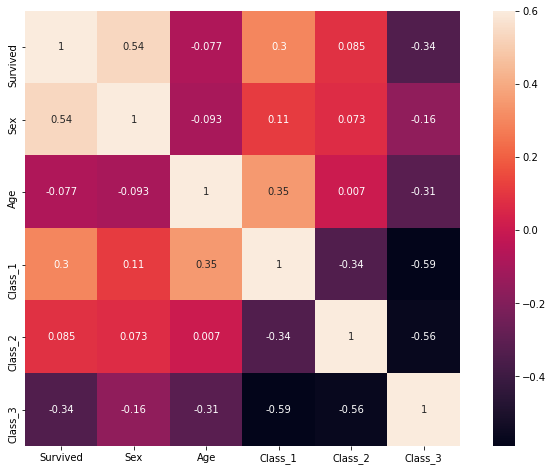

In [57]:
plt.figure(figsize=[12,8])
sns.heatmap(dr.corr(), vmax=0.6, square=True, annot=True)

In [58]:
print 'Splitting raw data to train and verify sets'

dt, dv = train_test_split(dr, test_size=0.2)
print 'Train size=', len(dt)
print 'Verify size=', len(dv)

Splitting raw data to train and verify sets
Train size= 571
Verify size= 143


In [59]:
print 'Splitting train/verify data to input and expected values'

dty = dt['Survived']
dtx = dt.drop('Survived', axis=1)

dvy = dv['Survived']
dvx = dv.drop('Survived', axis=1)

print 'Train data X shape', dtx.shape
print 'Train data Y:'
dty.head()

Splitting train/verify data to input and expected values
Train data X shape (571, 5)
Train data Y:


435    1
605    0
771    0
850    0
661    0
Name: Survived, dtype: int64

In [170]:
print 'Converting from panda dataframe to regular python list and dropping the index column'
ddtx = [x[1:] for x in dtx.itertuples()]
ddty = [y[1:] for y in dty.iteritems()]

ddvx = [x[1:] for x in dvx.itertuples()]
ddvy = [y[1:] for y in dvy.iteritems()]

print 'Size of X/Y of train data', len(ddtx), len(ddty)
print 'Size of X/Y of train data', len(ddvx), len(ddvy)
#print ddtx, ddty
print ddty[:10]

Converting from panda dataframe to regular python list and dropping the index column
Size of X/Y of train data 571 571
Size of X/Y of train data 143 143
[(1,), (0,), (0,), (0,), (0,), (1,), (0,), (1,), (0,), (0,)]


In [61]:
print 'Data preparation done'

Data preparation done


In [252]:
features = dtx.shape[1] # how many different features the input data has

X = tf.placeholder("float", shape=[None, features], name="x")
Y = tf.placeholder("float", shape=[None, 1], name="y")

# 5 by 1 tensors
w = tf.Variable(tf.random_normal([features, 1], stddev=0.4), name="weight")
b = tf.Variable(tf.random_normal([1, features], stddev=0.3), name="bias")

train_samples        = dtx.shape[0]
verification_samples = dvx.shape[0]
pred                 = tf.reduce_sum(tf.add(tf.matmul(X,w), b), axis=1)
#pred                 = tf.add(tf.matmul(X,w), b)
pred_rounded         = tf.minimum(tf.maximum(tf.round(pred),tf.constant(0.0)),tf.constant(1.0))
pred_compared        = tf.equal(pred_rounded, tf.reduce_sum(Y, axis=1))
accuracy             = tf.reduce_mean(tf.cast(pred_compared, tf.float32))
predSimple           = tf.matmul(X,w)
cost                 = tf.reduce_sum(tf.square(pred-tf.reduce_sum(Y, axis=1)))/(2*train_samples)
verification_cost    = tf.reduce_sum(tf.square(pred-tf.reduce_sum(Y, axis=1)))/(2*verification_samples)
optimizer            = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
acc                  = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
acc                  = tf.reduce_mean(tf.cast(acc, tf.float32))
init                 = tf.global_variables_initializer()

In [257]:
visualize_x                 = []
visualize_cost              = []
visualize_verification_cost = []
visualize_acc               = []
visualize_verification_acc  = []

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(0,200):
        # for each epoch train it first on the whole train set
        for (x, y) in zip(ddtx, ddty):
            sess.run(optimizer, feed_dict={X: [x], Y: [y]})
                
        if (epoch%10 ==0):
            # evaluate error for training / verification
            epoch_acc               = sess.run(accuracy,          feed_dict={X: ddvx, Y: ddvy})
            epoch_verification_acc  = sess.run(accuracy,          feed_dict={X: ddtx, Y: ddty})
            epoch_cost              = sess.run(cost,              feed_dict={X: ddtx, Y: ddty})
            epoch_verification_cost = sess.run(verification_cost, feed_dict={X: ddvx, Y: ddvy})

            #save valuse so they can be graphed into a plot later
            visualize_x.append(epoch);
            visualize_cost.append(epoch_cost);
            visualize_verification_cost.append(epoch_verification_cost);
            visualize_acc.append(epoch_acc);
            visualize_verification_acc.append(epoch_verification_acc);

            # print results only every 10 epochs
            print 'Epoch=', epoch, ' cost=', epoch_cost, ' verification_cost=', epoch_verification_cost, 'acc=', epoch_acc, 'acc_verfication=', epoch_verification_acc
            print 'y = x * w + b'
            print 'w=',               sess.run(w)
            print 'b=',               sess.run(b)
            print
            
    # final preidctions for both train/verify sets
    train_predict  = sess.run(pred_rounded, feed_dict={X: ddtx})
    verify_predict = sess.run(pred_rounded, feed_dict={X: ddvx})

    print 'Saving trained w/b in tf format'
    tf.train.Saver([w, b]).save(sess, "../out/titanic.mk2.ckpt")

    print 'Saving trained w/b in plain-text format without scientific notation (forcing %f format)'
    w_val, b_val = sess.run([w, b])
    np.savetxt("../out/titanic.mk2-w.csv", w_val, delimiter=",", fmt='%f') 
    np.savetxt("../out/titanic.mk2-b.csv", b_val, delimiter=",", fmt='%f') 
    
    print "Confusion matrix:"
    print sess.run(tf.confusion_matrix(labels=ddvy, predictions=verify_predict, num_classes=2))

Epoch= 0  cost= 2.0014586  verification_cost= 2.924779 acc= 0.5104895 acc_verfication= 0.5236427
y = x * w + b
w= [[ 0.10231772]
 [-0.73005676]
 [ 0.32427123]
 [-0.4242814 ]
 [ 0.36784032]]
b= [[-0.60612273  0.3523576   0.34678715 -0.10155909 -0.15606971]]

Epoch= 10  cost= 0.5818655  verification_cost= 0.8534568 acc= 0.5944056 acc_verfication= 0.5884413
y = x * w + b
w= [[ 0.16385688]
 [-0.6066454 ]
 [ 0.34710476]
 [-0.12313496]
 [ 0.2594574 ]]
b= [[-0.5630059   0.39547753  0.3899071  -0.05843993 -0.11295044]]

Epoch= 20  cost= 0.2679535  verification_cost= 0.36810672 acc= 0.72727275 acc_verfication= 0.68126094
y = x * w + b
w= [[ 0.14920688]
 [-0.54844517]
 [ 0.32845688]
 [ 0.02297669]
 [ 0.1951965 ]]
b= [[-0.5503672   0.40811858  0.40254816 -0.04579942 -0.1003097 ]]

Epoch= 30  cost= 0.17301932  verification_cost= 0.2131803 acc= 0.74125874 acc_verfication= 0.73380035
y = x * w + b
w= [[ 0.12651801]
 [-0.50845057]
 [ 0.30881852]
 [ 0.09853627]
 [ 0.16532804]]
b= [[-0.5451553   0.4133

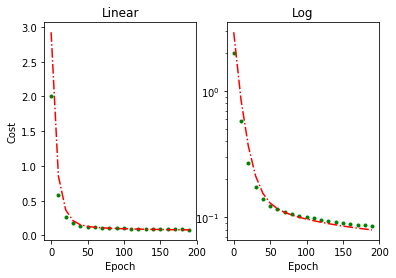

In [258]:
f, sb = plt.subplots(1, 2)
sb[0].set_title('Linear')
sb[0].set_ylabel('Cost')
sb[0].set_xlabel('Epoch')
sb[0].plot(visualize_x, visualize_cost, "g.")
sb[0].plot(visualize_x, visualize_verification_cost, "r-.")

sb[1].set_title('Log')
sb[1].set_xlabel('Epoch')
sb[1].set_yscale('log')
sb[1].plot(visualize_x, visualize_cost, "g.")
sb[1].plot(visualize_x, visualize_verification_cost, "r-.")

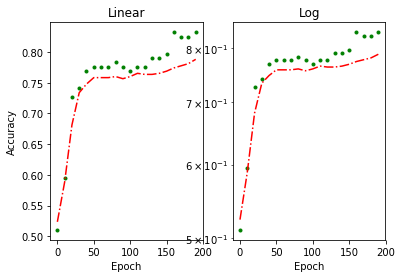

In [259]:
f, sb = plt.subplots(1, 2)
sb[0].set_title('Linear')
sb[0].set_ylabel('Accuracy')
sb[0].set_xlabel('Epoch')
sb[0].plot(visualize_x, visualize_acc, "g.")
sb[0].plot(visualize_x, visualize_verification_acc, "r-.")

sb[1].set_title('Log')
sb[1].set_xlabel('Epoch')
sb[1].set_yscale('log')
sb[1].plot(visualize_x, visualize_acc, "g.")
sb[1].plot(visualize_x, visualize_verification_acc, "r-.")

In [261]:
print 'quick comparison between predicted and expected train/verify results'
print 'train set:'
print train_predict[:12]
print ddty[:12]
print
print 'verify set:'
print verify_predict[:12]
print ddvy[:12]

quick comparison between predicted and expected train/verify results
train set:
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[(1,), (0,), (0,), (0,), (0,), (1,), (0,), (1,), (0,), (0,), (1,), (0,)]

verify set:
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
[(0,), (0,), (0,), (0,), (0,), (1,), (1,), (1,), (1,), (1,), (0,), (1,)]
